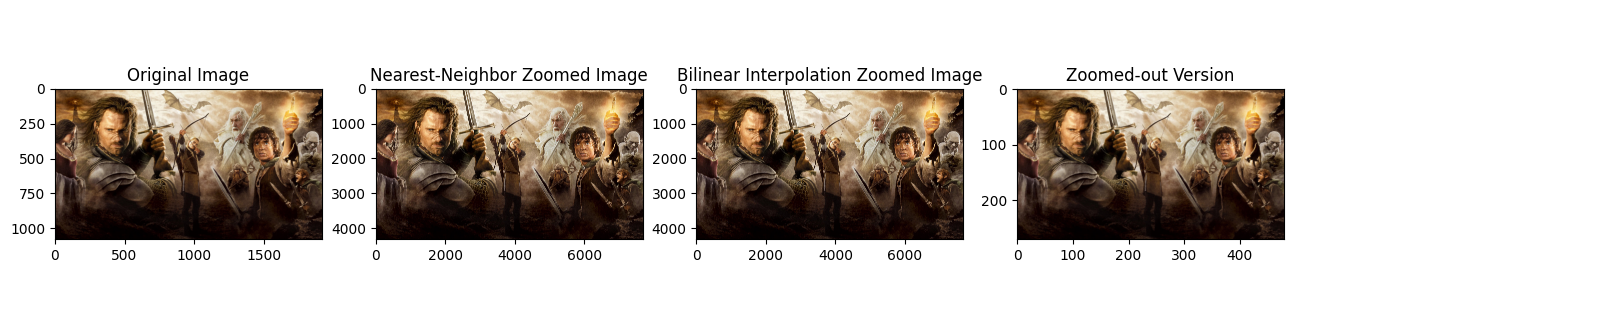

Normalized SSD for image 1 using nearest neighbor: 0.3197612407479292
Normalized SSD for image 1 using bilinear interpolation: 0.08906798428775378



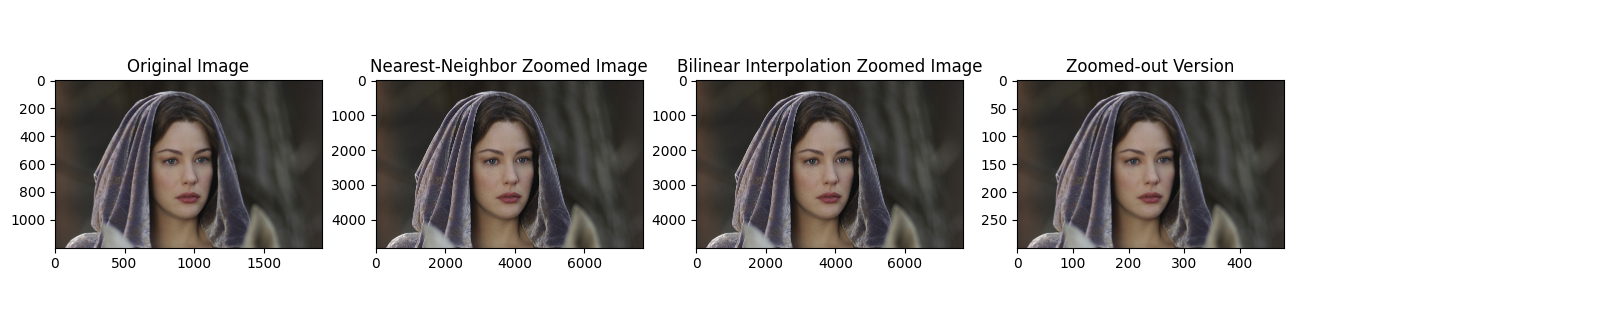

Normalized SSD for image 2 using nearest neighbor: 0.0959308598140319
Normalized SSD for image 2 using bilinear interpolation: 0.01882850886884751



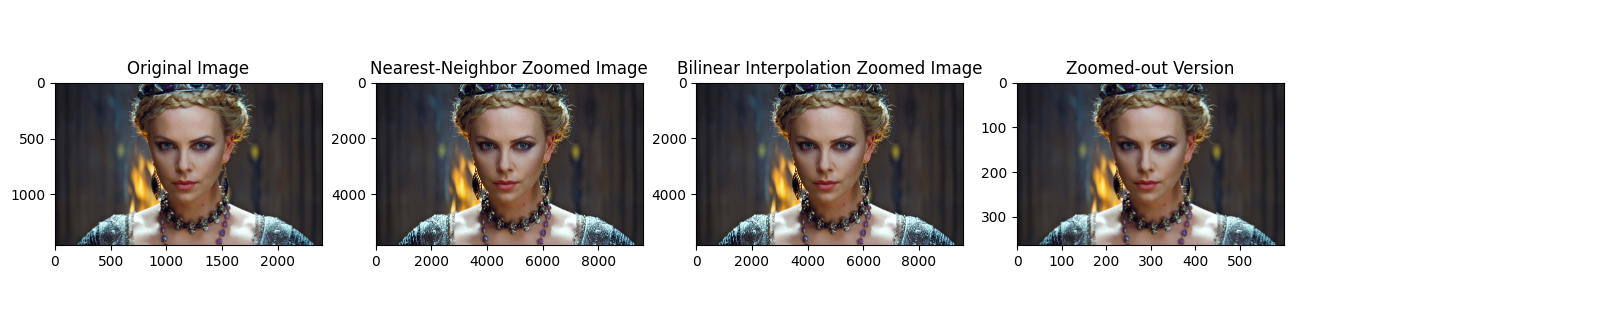

Normalized SSD for image 3 using nearest neighbor: 0.14454886324030364
Normalized SSD for image 3 using bilinear interpolation: 0.032463342532193434



In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

zoomed_outs = ["../a1images/a1q5images/im01small.png", 
               "../a1images/a1q5images/im02small.png", 
               "../a1images/a1q5images/im03small.png"]
originals = ["../a1images/a1q5images/im01.png", 
             "../a1images/a1q5images/im02.png", 
             "../a1images/a1q5images/im03.png"]

for i in range(3):
    img = cv.imread(originals[i])
    img1 = cv.imread(zoomed_outs[i])
    
    # Resize the original image using nearest neighbor and bilinear interpolation
    img_resized_nearest = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    img_resized_bilinear = cv.resize(img, img_resized_nearest.shape[1::-1], interpolation=cv.INTER_LINEAR)

    # Resize img1 to match the size of img_resized_nearest for comparison
    img1_resized = cv.resize(img1, (img_resized_nearest.shape[1], img_resized_nearest.shape[0]))

    # Correct SSD calculation
    ssd_near = np.sum((img_resized_nearest - img1_resized) ** 2)  # Compare to the resized zoomed-out version
    ssd_bilinear = np.sum((img_resized_nearest - img_resized_bilinear) ** 2)

    max_possible_ssd = np.sum((img_resized_nearest - np.zeros_like(img_resized_nearest)) ** 2)

    normalized_ssd_near = ssd_near / max_possible_ssd
    normalized_ssd_bilinear = ssd_bilinear / max_possible_ssd

    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(img_resized_nearest, cv.COLOR_BGR2RGB))
    ax[1].set_title("Nearest-Neighbor Zoomed Image")
    ax[2].imshow(cv.cvtColor(img_resized_bilinear, cv.COLOR_BGR2RGB))
    ax[2].set_title("Bilinear Interpolation Zoomed Image")
    ax[3].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
    ax[3].set_title("Zoomed-out Version")
    ax[4].axis('off')
    
    plt.show()

    # Print normalized SSD values
    print(f"Normalized SSD for image {i+1} using nearest neighbor: {normalized_ssd_near}")
    print(f"Normalized SSD for image {i+1} using bilinear interpolation: {normalized_ssd_bilinear}")
    print()


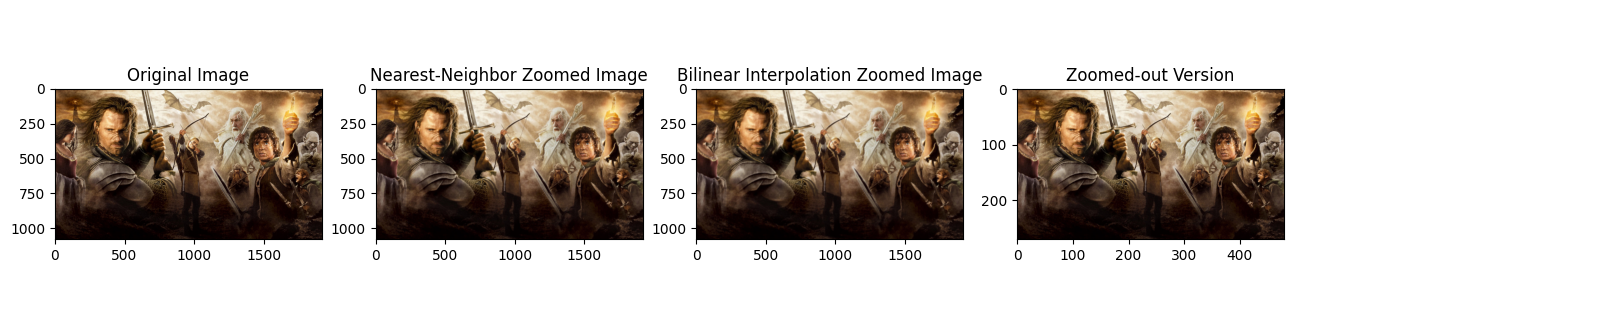

Normalized SSD for image 1 using nearest neighbor zooming: 0.3198745166239323
Normalized SSD for image 1 using bilinear interpolation zooming: 0.3175103293330475



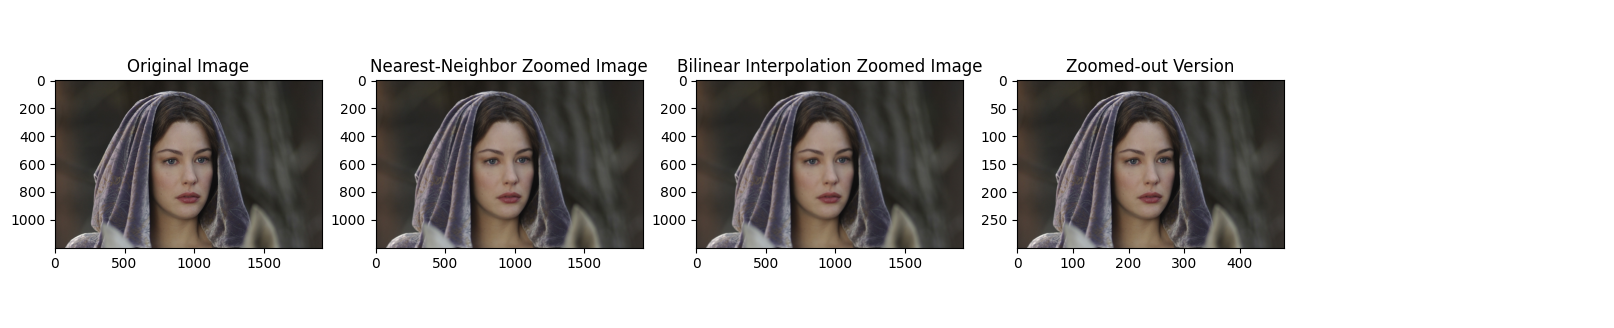

Normalized SSD for image 2 using nearest neighbor zooming: 0.10512274929879548
Normalized SSD for image 2 using bilinear interpolation zooming: 0.09435592404356727



In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

zoomed_outs = ["../a1images/a1q5images/im01small.png", "../a1images/a1q5images/im02small.png"]
originals = ["../a1images/a1q5images/im01.png", "../a1images/a1q5images/im02.png"]

for i in range(2):
    img = cv.imread(originals[i])
    zoomed_out_img = cv.imread(zoomed_outs[i])
    
    # Zoom using nearest neighbor
    near_img = cv.resize(zoomed_out_img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    
    # Zoom using bilinear interpolation
    bilinear_img = cv.resize(zoomed_out_img, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

    # # Resize both zoomed images to match the zoomed-out image dimensions
    # linear_img_to_original = cv.resize(linear_img, (zoomed_out_img.shape[1], zoomed_out_img.shape[0]), interpolation=cv.INTER_NEAREST)
    # bilinear_linear_img = cv.resize(bilinear_img, (zoomed_out_img.shape[1], zoomed_out_img.shape[0]), interpolation=cv.INTER_LINEAR)

    # Compute SSD for nearest neighbor zooming against the zoomed-out image
    ssd_near = np.sum((img - near_img) ** 2)  # Corrected: Compare against the zoomed-out image
    ssd_bilinear = np.sum((img - bilinear_img) ** 2)  # Compare bilinear zoomed image against the zoomed-out image

    max_possible_ssd = np.sum(img ** 2)

    normalized_ssd_near = ssd_near / max_possible_ssd
    normalized_ssd_bilinear = ssd_bilinear / max_possible_ssd

    # Plotting images
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(near_img, cv.COLOR_BGR2RGB))
    ax[1].set_title("Nearest-Neighbor Zoomed Image")
    ax[2].imshow(cv.cvtColor(bilinear_img, cv.COLOR_BGR2RGB))
    ax[2].set_title("Bilinear Interpolation Zoomed Image")
    ax[3].imshow(cv.cvtColor(zoomed_out_img, cv.COLOR_BGR2RGB))
    ax[3].set_title("Zoomed-out Version")
    ax[4].axis('off')
    plt.show()

    # Print normalized SSD values
    print(f"Normalized SSD for image {i+1} using nearest neighbor zooming: {normalized_ssd_near}")
    print(f"Normalized SSD for image {i+1} using bilinear interpolation zooming: {normalized_ssd_bilinear}")
    print()
